本文介绍 matplotlib 相关的内容，以例子为主。

<!-- more -->

全文的初始化加载如下：

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

from numpy.random import rand

本文最后编辑时，使用的各版本号如下：

In [2]:
np.__version__, pd.__version__, mpl.__version__

('1.12.1', '0.19.2', '2.0.1')

## 绘制与保存

### 基础绘图：plt.plot

基础的绘图使用 plt.plot() 命令，并用 plt.show() 显示。

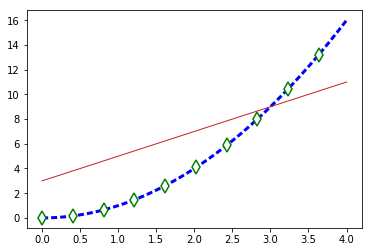

In [3]:
# 向量常常使用 linspace 或者 arange 命令进行初始化。下两例等价：
# np.linspace(0, 4, 4)：闭区间 [0,4] 上等距取 4 个点
# np.arange(0, 5, 1)：左闭右开区间 [0, 5) 上以步长 1 取点
x = np.linspace(0, 4, 100)
y1 = x ** 2
y2 = 2 * x + 3

plt.plot(x, y1, color="b", linestyle=":", linewidth=3, dashes=(2,1),  # 线的属性
         marker="d", ms=10, mew=1.5, mec="g", mfc="w",  # 点的属性
         markevery=10)
plt.plot(x, y2, "#bf242a", ls="-", lw=1)
plt.show()

一些常用的性质：
- **color**：线的颜色。基础的有红r，绿g，蓝b，青c，洋红m，黄y，黑k，白w。**参考本节的“颜色”小节。**
  - 一些其他的颜色表述：color="#66ccff" HTML码；(1, 0, 0) 标准化的RGB元组；"0.5" 灰度字串。
- **linestyle(ls)**：线型。实线"-"，虚线"--"，点划线"-."，点线":"。
  - dashes: 虚线比例。传入元组 (a,b)，那么划线长与间隔长之比为 a/b。
- **linewidth(lw)**：线宽。
- **marker**：点样式。实心"."，像素","，圆点"o"，方块"s"，上折/下折箭头"v"/"\^"，左折/右折箭头"<"/">"，五边形"p"，六边形"h"，星"\*"，加号"+"，叉号"x"，(瘦)钻石"d/D"，竖线"'&#124;"，横线"\_"。
  - markevery：每几个点才绘制一个点。
  - markersize(ms)：点大小。
  - markeredgewidth(mew)：点边缘线宽。
  - markeredgecolor(mec)：点边缘颜色。默认与线同色。
  - markerfacecolor(mfc)：点填充颜色。默认与线同色。

另外介绍 plt.close() 命令。通常用 `plt.close("all")` 来关闭所有的图片。

### 多图绘制：plt.subplots

上面的内容我称之为基础绘制，是一种多语句排列、最后用 plt.show() 命令转换为图像输出的方式。而下文要介绍的命令，大多是基于多图绘制的，会**事先声明总图(figure对象)与所有子图句柄(Axes对象)**。

例如 plt.title() 命令是基础绘制中的命令，直接调用自 matplotlib.pyplot 里的命令。而在多图绘制下，则是先生成一种子图的实例 ax，再从实例中调用一个等价的函数 ax.set_title() 。

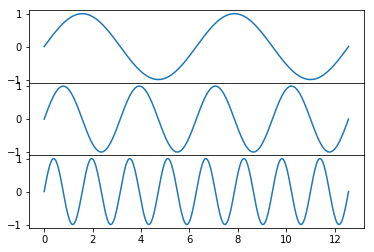

In [4]:
# 该例子改编自：http://matplotlib.org/examples/pylab_examples/subplots_demo.html
x = np.linspace(0, 4 * np.pi, 400)
y1 = np.sin(x)
y2 = np.sin(2 * x)
y3 = np.sin(4 * x)
y = [y1, y2, y3]

plt.close("all")
# f, (ax1, ax2, ax3) = ... 也是一种写法
f, axarr = plt.subplots(3, sharex=True, sharey=True)
f.subplots_adjust(hspace=0)  # 调整函数
# 如果是多行多列，可以使用 axarr = axarr.ravel() 再以 for 遍历
for i in range(len(y)):
    axarr[i].plot(x, y[i])

plt.show()

`plt.subplots()` 是一个实用的命令：
- nrows, ncols：子图的行数与列数。默认为 1. 上例的 subplots(3) 相当于 subplots(3, 1)。
- sharex, sharey：轴对齐True，不对齐False，每行对齐"row"，每列对齐"col"。

有些参数可以直接在 subplots 中使用，但其实会进一步传递给其他函数。一并在这里介绍：
- figsize：元组。总图的长与宽。
- subplot_kw：传递给命令 `add_subplot()` 的参数，常用的是极坐标 dict(projection='polar')。
- gridspec_kw：字典。给出各列/行子图之间的宽/长之比，例如“条形图”一节：gridspec_kw={'height_ratios':[1, 2]}。

调整函数 `subplots_adjust` 是一个视觉命令：
- left, right, bottom, top：间距。
- hspace，wspace：纵向/横向间距。

### 图像保存

多图绘制一个便利之处在于，已经将图像存储在了声明的 Figure 对象中。例如对于上一节的例子：

```python
filename = r'd:\test.pdf'  # 这一步常常配合 os.getcwd() 来获取工作目录，再保存图片
f.savefig(filename, transparent='True', format='pdf')
```

如果是 png 格式，还可以用 dpi=... 参数标定其图片质量。

有时候我们需要操作动态图；**对于动态图 GIF 的保存，请参考本文附录**。

### 颜色

matplotlib 中的颜色支持用以下的方式指定：

- 标准化的 RGB：以三元元组的形式，比如 `(0, 0, 1)` 代表 (0, 0, 255)，即纯蓝。
- HTML 16进制颜色码：以字符串的形式，比如 `"#0F0F0F}"`。
- 标准化的灰度值：以字符串形式，比如 `0.5` 。
- RGB 与 CMYK 标准色字符：以单个字符形式，有：`r,g,b,c,m,y,k,w` 八种，其中 w 是白色。
- X11/CSS4 标准的颜色名：
- XKCD 颜色调查（参考[此页面](https://xkcd.com/color/rgb/)）：例如"xksd:sky blue"。

以及 matplotlib 采用的：
- matplotlib 默认的十色环："C0", "C1", ……，"C9"。这是 matplotlib 绘图默认依次使用的颜色。
- 十色环的另一种形式：'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'。

以上字符串（除16进制码外）均是大小写敏感的。

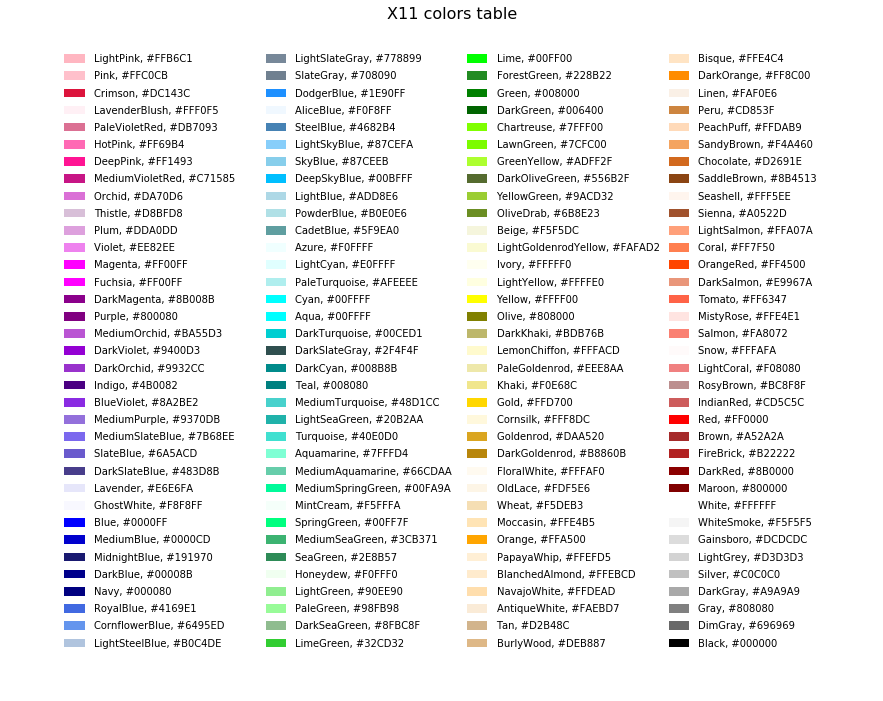

In [5]:
# A list of X11 color names from: http://cng.seas.rochester.edu/CNG/docs/x11color.html
# Total 140 colors included.
colors = [("LightPink", "#FFB6C1"),("Pink", "#FFC0CB"),("Crimson", "#DC143C"),("LavenderBlush", "#FFF0F5"),
          ("PaleVioletRed", "#DB7093"),("HotPink", "#FF69B4"),("DeepPink", "#FF1493"),("MediumVioletRed", "#C71585"),        
          ("Orchid", "#DA70D6"),("Thistle", "#D8BFD8"),("Plum", "#DDA0DD"),("Violet", "#EE82EE"),                            
          ("Magenta", "#FF00FF"),("Fuchsia", "#FF00FF"),("DarkMagenta", "#8B008B"),("Purple", "#800080"),                    
          ("MediumOrchid", "#BA55D3"),("DarkViolet", "#9400D3"),("DarkOrchid", "#9932CC"),("Indigo", "#4B0082"),             
          ("BlueViolet", "#8A2BE2"),("MediumPurple", "#9370DB"),("MediumSlateBlue", "#7B68EE"),("SlateBlue", "#6A5ACD"),     
          ("DarkSlateBlue", "#483D8B"),("Lavender", "#E6E6FA"),("GhostWhite", "#F8F8FF"),("Blue", "#0000FF"),                
          ("MediumBlue", "#0000CD"),("MidnightBlue", "#191970"),("DarkBlue", "#00008B"),("Navy", "#000080"),                 
          ("RoyalBlue", "#4169E1"),("CornflowerBlue", "#6495ED"),("LightSteelBlue", "#B0C4DE"),("LightSlateGray", "#778899"),
          ("SlateGray", "#708090"),("DodgerBlue", "#1E90FF"),("AliceBlue", "#F0F8FF"),("SteelBlue", "#4682B4"),              
          ("LightSkyBlue", "#87CEFA"),("SkyBlue", "#87CEEB"),("DeepSkyBlue", "#00BFFF"),("LightBlue", "#ADD8E6"),            
          ("PowderBlue", "#B0E0E6"),("CadetBlue", "#5F9EA0"),("Azure", "#F0FFFF"),("LightCyan", "#E0FFFF"),                  
          ("PaleTurquoise", "#AFEEEE"),("Cyan", "#00FFFF"),("Aqua", "#00FFFF"),("DarkTurquoise", "#00CED1"),                 
          ("DarkSlateGray", "#2F4F4F"),("DarkCyan", "#008B8B"),("Teal", "#008080"),("MediumTurquoise", "#48D1CC"),           
          ("LightSeaGreen", "#20B2AA"),("Turquoise", "#40E0D0"),("Aquamarine", "#7FFFD4"),("MediumAquamarine", "#66CDAA"),   
          ("MediumSpringGreen", "#00FA9A"),("MintCream", "#F5FFFA"),("SpringGreen", "#00FF7F"),("MediumSeaGreen", "#3CB371"),
          ("SeaGreen", "#2E8B57"),("Honeydew", "#F0FFF0"),("LightGreen", "#90EE90"),("PaleGreen", "#98FB98"),                
          ("DarkSeaGreen", "#8FBC8F"),("LimeGreen", "#32CD32"),("Lime", "#00FF00"),("ForestGreen", "#228B22"),               
          ("Green", "#008000"),("DarkGreen", "#006400"),("Chartreuse", "#7FFF00"),("LawnGreen", "#7CFC00"),                  
          ("GreenYellow", "#ADFF2F"),("DarkOliveGreen", "#556B2F"),("YellowGreen", "#9ACD32"),("OliveDrab", "#6B8E23"),      
          ("Beige", "#F5F5DC"),("LightGoldenrodYellow", "#FAFAD2"),("Ivory", "#FFFFF0"),("LightYellow", "#FFFFE0"),          
          ("Yellow", "#FFFF00"),("Olive", "#808000"),("DarkKhaki", "#BDB76B"),("LemonChiffon", "#FFFACD"),                   
          ("PaleGoldenrod", "#EEE8AA"),("Khaki", "#F0E68C"),("Gold", "#FFD700"),("Cornsilk", "#FFF8DC"),                     
          ("Goldenrod", "#DAA520"),("DarkGoldenrod", "#B8860B"),("FloralWhite", "#FFFAF0"),("OldLace", "#FDF5E6"),           
          ("Wheat", "#F5DEB3"),("Moccasin", "#FFE4B5"),("Orange", "#FFA500"),("PapayaWhip", "#FFEFD5"),                      
          ("BlanchedAlmond", "#FFEBCD"),("NavajoWhite", "#FFDEAD"),("AntiqueWhite", "#FAEBD7"),("Tan", "#D2B48C"),           
          ("BurlyWood", "#DEB887"),("Bisque", "#FFE4C4"),("DarkOrange", "#FF8C00"),("Linen", "#FAF0E6"),                     
          ("Peru", "#CD853F"),("PeachPuff", "#FFDAB9"),("SandyBrown", "#F4A460"),("Chocolate", "#D2691E"),                   
          ("SaddleBrown", "#8B4513"),("Seashell", "#FFF5EE"),("Sienna", "#A0522D"),("LightSalmon", "#FFA07A"),               
          ("Coral", "#FF7F50"),("OrangeRed", "#FF4500"),("DarkSalmon", "#E9967A"),("Tomato", "#FF6347"),                     
          ("MistyRose", "#FFE4E1"),("Salmon", "#FA8072"),("Snow", "#FFFAFA"),("LightCoral", "#F08080"),                      
          ("RosyBrown", "#BC8F8F"),("IndianRed", "#CD5C5C"),("Red", "#FF0000"),("Brown", "#A52A2A"),                         
          ("FireBrick", "#B22222"),("DarkRed", "#8B0000"),("Maroon", "#800000"),("White", "#FFFFFF"),                        
          ("WhiteSmoke", "#F5F5F5"),("Gainsboro", "#DCDCDC"),("LightGrey", "#D3D3D3"),("Silver", "#C0C0C0"),                 
          ("DarkGray", "#A9A9A9"),("Gray", "#808080"),("DimGray", "#696969"),("Black", "#000000")]                           

plt.close("all")
f, ax = plt.subplots(figsize=(15, 12))
w, h = 10, 4
rowpad, colpad = 2, 9 
for i in range(140):
    curname = colors[i][0]
    cols, rows = divmod(i, 35)
    rows = 34 - rows
    ax.fill_between([w * cols, w * (cols + 1) - colpad],
                    [h * rows, h * rows], 
                    [h * (rows + 1) - rowpad, h * (rows + 1) - rowpad],
                    facecolor=curname)
    ax.text(w * (cols + 1) - 0.95*colpad, h * rows + (h - rowpad) / 2, "{}, {}".format(*colors[i]), 
            horizontalalignment="left", verticalalignment='center')
ax.axis(xmax=4*w)
ax.set_axis_off()
ax.set_title("X11 colors table", fontsize=16)
    
plt.show()

### rcParams：默认参数

从上面的绘图中可以看到，即使没有指定线型、点样式，matplotlib 也能以其默认的颜色、样式绘图。这些默认参数是可以修改的。它们都存储在 `matplotlib.rcParams` 这个大字典变量中。例如默认的线颜色：

In [6]:
mpl.rcParams["lines.color"]

'C0'

使用 `rc` 命令来更改默认参数的值，例如下例将更改 `mpl.rcParams["lines.linewidth"]` 与 ``mpl.rcParams["lines.color"]`` 两个键值：

In [7]:
# 更改默认的值：
# mpl.rc('lines', linewidth=2, color='r')

# 仅在接下来绘制的图片中应用值：
# plt.rc(...)

一个绘图的例子：

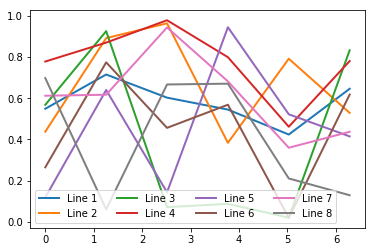

In [8]:
from cycler import cycler

n = 6
line_num = 8
x = np.linspace(0, 2 * np.pi, n)
np.random.seed(0)
y = np.random.rand(line_num, n)

plt.close("all")
f, ax = plt.subplots()

plt.rc("lines", linewidth=2)
plt.rc("axes", prop_cycle=(cycler('color', ['Salmon', 'Orange', 'SeaGreen', 'DodgerBlue']) +
                           cycler('linestyle', ['-', '--', ':', '-.'])))

for i in range(line_num):
    ax.plot(x, y[i], label="Line {}".format(i+1))

ax.legend(loc="lower left", ncol=4)
plt.show()

要想下面的图片绘制不受影响，使用以下命令恢复默认值：

In [9]:
mpl.rcParams.update(mpl.rcParamsDefault)

## 图像控制

下面介绍一些常用的控制参数，如坐标轴区间、标签、标题文字等等。

### 图像、坐标轴标题：Axes.set_title / set_x(y)label

设置标题时可以传入字体参数字典 `fontdict` （或者将其中的键单独传递，如下例），默认值是：

```Python
{'fontsize': rcParams['axes.titlesize'],
 'fontweight' : rcParams['axes.titleweight'],
 'verticalalignment': 'baseline',
 'horizontalalignment': loc}
 ```
坐标轴标题 `set_xlabel/set_ylabel` 可以使用 `labelpad` 参数，设定到坐标轴的距离的倍数值。
 
如果要设定标题到图像的距离，使用 `set_title` 的 `y` 参数 ，例如 y = 1.05. 

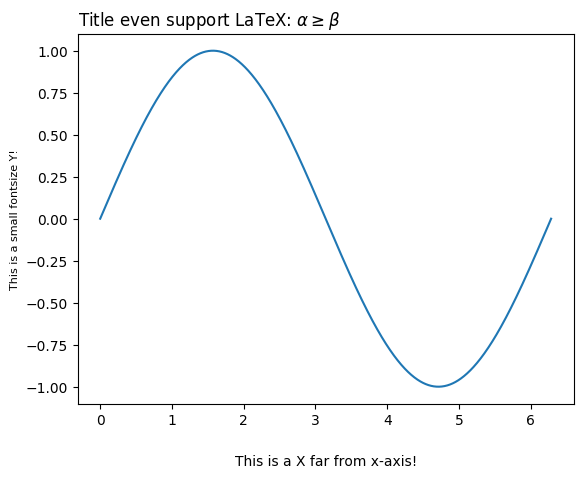

In [10]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)

plt.close("all")
f, ax = plt.subplots()
ax.plot(x, y)
ax.set_title(r"Title even support LaTeX: $\alpha\geq\beta$", loc="left", fontsize=12)
ax.set_xlabel("This is a X far from x-axis!", labelpad=20)
ax.set_ylabel("This is a small fontsize Y!", fontsize=8)

plt.show()

### 坐标轴命令：

坐标轴命令有很多：

1. 设置坐标轴区间：`Axes.axis`，可以通过选项 `xmin/xmax/ymin/ymax` 指定单侧边界。
2. 设置单轴区间：`Axes.set_xlim/ylim`
3. 显示、隐藏坐标轴：`Axes.set_axis_on/off`
4. 隐藏坐标框:`Axes.set_frame_on`，传入 False 以隐藏。
5. 设置坐标轴背景色：`Axes.set_facecolor`，传入颜色字符串。

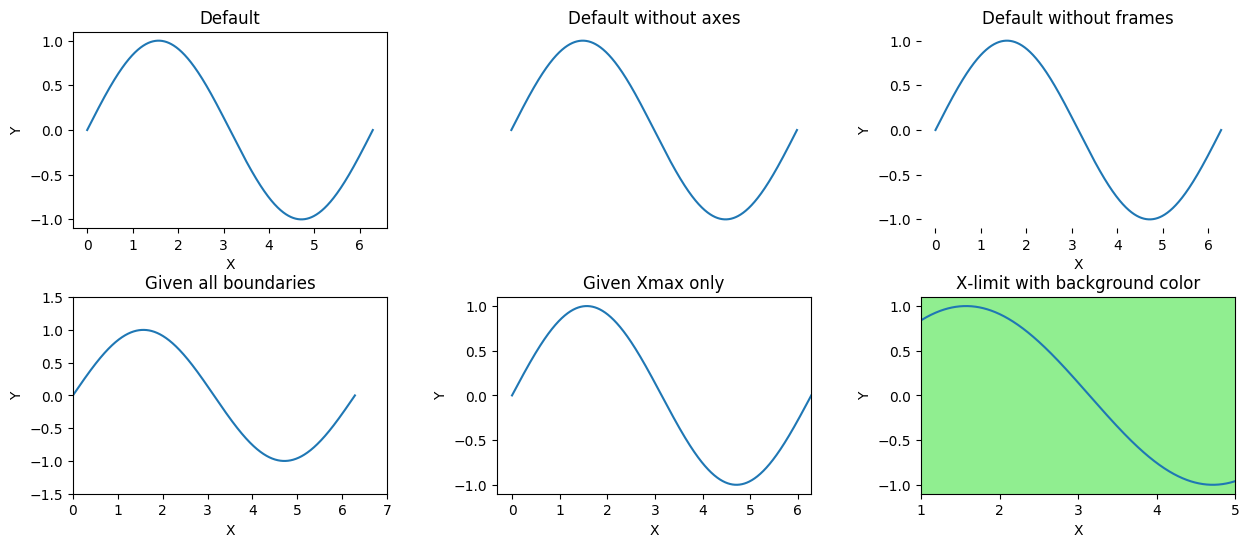

In [11]:
x = np.linspace(0, 2 * np.pi, 1000)
y = np.sin(x)
titles = ["Default", "Default without axes", "Default without frames",
          "Given all boundaries", "Given Xmax only", 
          "X-limit with background color"]

plt.close("all")
f, axarr = plt.subplots(2, 3, figsize=(15, 6))
f.subplots_adjust(hspace=0.35, wspace=0.35)

axarr = axarr.ravel()
for ax, t in zip(axarr, titles):
    ax.plot(x, y)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(t)

# axarr[0]：default
axarr[1].set_axis_off()
axarr[2].set_frame_on(False)
axarr[3].axis([0, 7, -1.5, 1.5])
axarr[4].axis(xmax=2 * np.pi)
axarr[5].set_xlim([1, 5])
axarr[5].set_facecolor("lightgreen")

plt.show()

### 坐标轴框架：Axes.spines

坐标轴框架可以设置其可见性与否 `set_visible`，并且移动其位置。

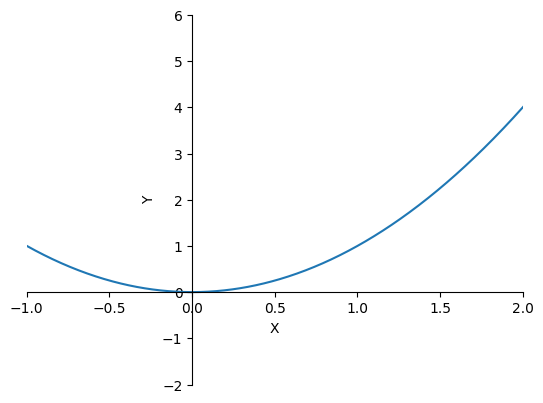

In [12]:
x = np.linspace(-1, 3, 1000)
y = x ** 2

plt.close('all')
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlabel("X")
ax.set_ylabel("Y")

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data', 0))
ax.spines['left'].set_position(('data', 0))
ax.axis([-1, 2, -2, 6])

plt.show()

### 图例：Axes.legend

图例配合 `plot` 函数的 label 参数使用，文字部分会直接使用 label 参数的字串。图例放置位置由 `loc` 参数指定，具体的取值有：
- 自动‘best’或0
- 右上‘upper right’或1
- 左上‘upper left’或2，左下‘lower left’或3，左中‘center left’或6
- 右下‘lower right’或4，右侧‘right’5，右中‘center right’或7
- 中下‘lower center’或8，中上‘upper center’或9，中部‘center’或10。

并可以结合 `bbox_to_anchor` 参数灵活地设置对齐参考，甚至放置在图框外侧。

图例由图线（handle）与文字（text）两部分组成，每对图线与文字组成一个标签（label）。由此理解：`borderpad`，`labelspacing`，`handlelength`，`handletextpad`，`borderaxespad`，`columnspacing` 这些空距控制参数。注意：`borderpad` 是一个比例值。

其他参数参考下面的例子。

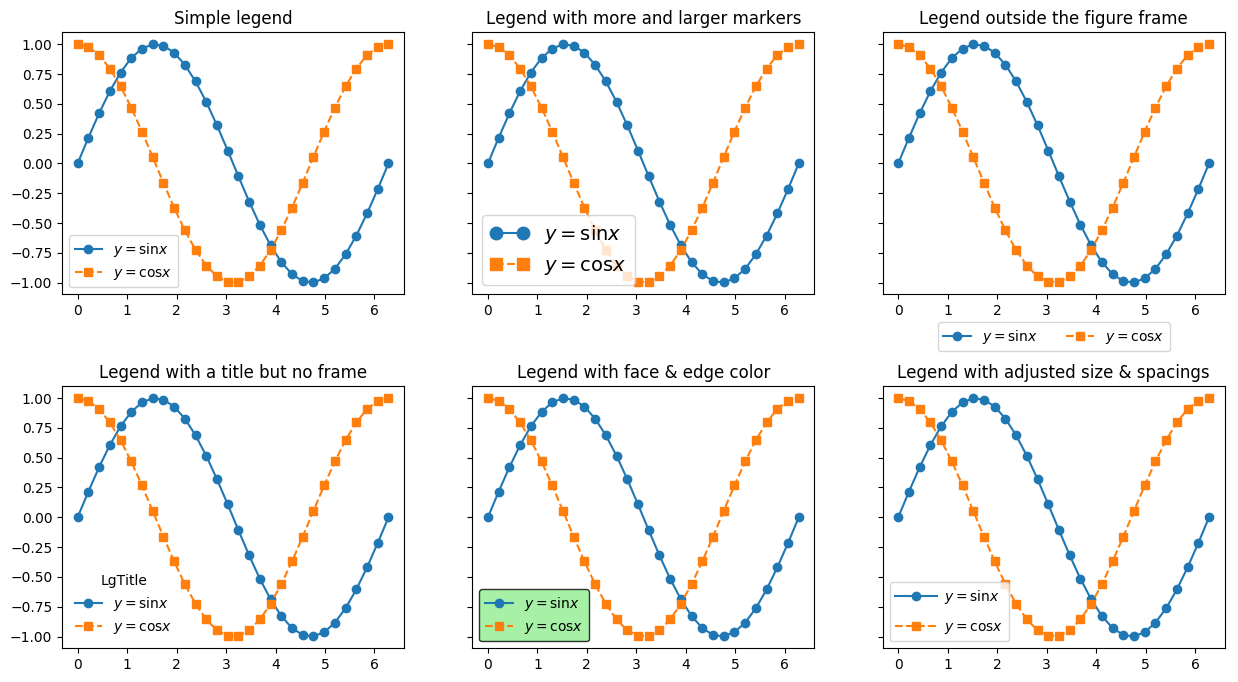

In [13]:
x = np.linspace(0, 2 * np.pi, 30)
y1, y2 = np.sin(x), np.cos(x)
titles = ["Simple legend", "Legend with more and larger markers", 
          "Legend outside the figure frame",
          "Legend with a title but no frame",
          "Legend with face & edge color",
          "Legend with adjusted size & spacings"]

plt.close("all")
f, axarr = plt.subplots(2, 3, sharey=True, figsize=(15, 8))
f.subplots_adjust(hspace=0.35)
axarr = axarr.ravel()
for ax, t in zip(axarr, titles):
    ax.plot(x, y1, "o-", label=r"$y=\sin x$")
    ax.plot(x, y2, "s--", label=r"$y=\cos x$")
    ax.set_title(t)

axarr[0].legend(loc="lower left")
axarr[1].legend(numpoints=2, markerscale=1.5, fontsize=14)
axarr[2].legend(loc="upper center", ncol=2, bbox_to_anchor=(0.5, -0.08))
axarr[3].legend(frameon=False, title="LgTitle")
axarr[4].legend(facecolor="lightgreen", edgecolor="k")
axarr[5].legend(handlelength=3, handletextpad=0.5,
                labelspacing=1, columnspacing=1)

plt.show()

### 刻度与刻度标签：Axes.set_x(y)ticks / x(y)ticklabels

刻度标签字符串的格式如何修改，也在下例中给出。

附注：方法 `Axes.set_xticks` 与 `Axes.xaxis.set_ticks` 是等价的。

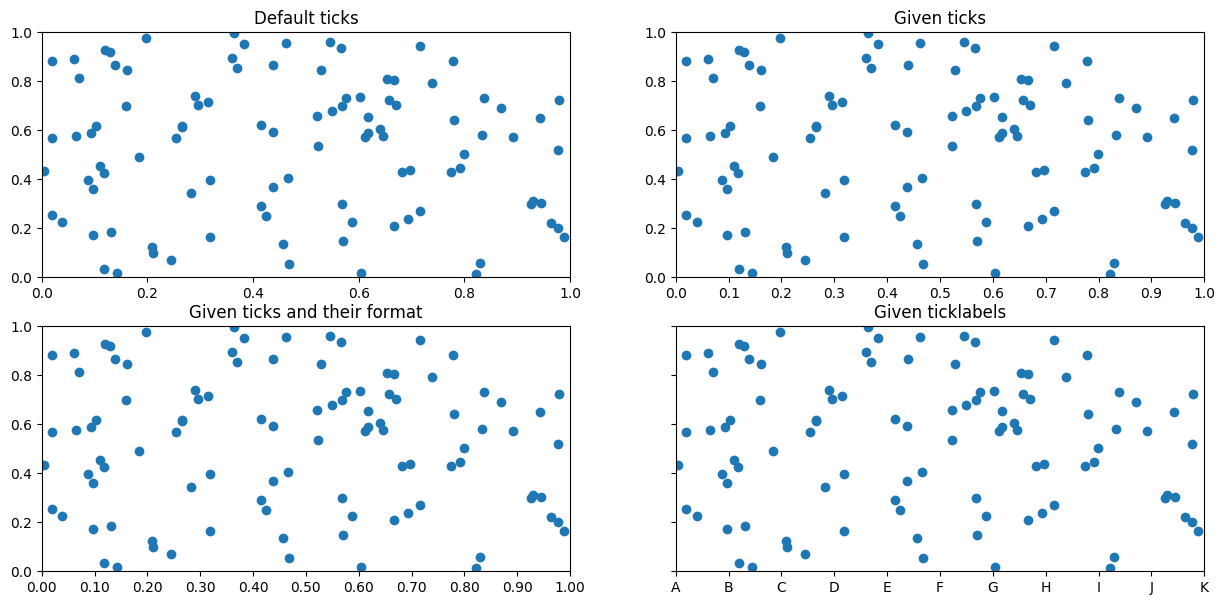

In [14]:
from matplotlib.ticker import FormatStrFormatter
import string

np.random.seed(0)
x, y = np.random.rand(2, 100)
titles = ["Default ticks", "Given ticks", 
          "Given ticks and their format", "Given ticklabels"]
xticksnum, yticksnum = 10, 5
xticks = np.linspace(0, 1, xticksnum + 1)
yticks = np.linspace(0, 1, yticksnum + 1)

plt.close("all")
f, axarr = plt.subplots(2, 2, figsize=(15, 7))
axarr =axarr.ravel()
for i in range(4):
    ax = axarr[i]
    ax.plot(x, y, "o")
    ax.set_title(titles[i])
    ax.axis([0, 1, 0, 1])
    if i > 0:
        ax.set_xticks(xticks)
        ax.set_yticks(yticks)
    
axarr[2].xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
axarr[3].set_xticklabels(string.ascii_uppercase[:xticksnum + 1])
axarr[3].set_yticklabels([])  # y 轴刻度标签留空

plt.show()

### 添加文字：Axes.text / annotate

一个简明的 `text` 命令的例子：

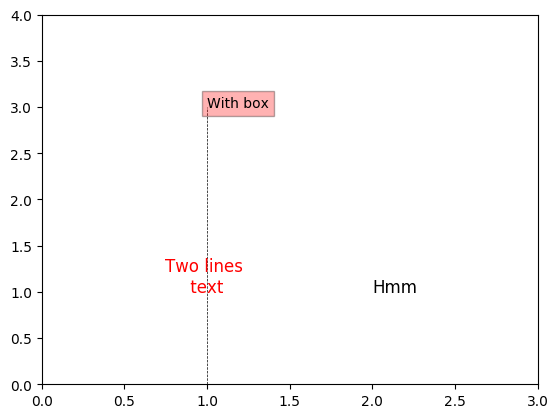

In [15]:
# 本例改编自：http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html
plt.close("all")
plt.plot([1 , 1], [0, 3], color='k', linewidth=0.5 , linestyle='--')

# 单独使用字号控制命令
plt.text(2, 1, 'Hmm', fontsize=12)  

# 使用字典形式的字体控制
plt.text(1, 1, 'Two lines \n text ', horizontalalignment='center', 
         fontdict={'size': 12, 'color': 'r'})  

# bbox 是一个复杂的参数，在此不多深入
plt.text(1, 3, 'With box', bbox=dict(facecolor='r', alpha=0.3))  

plt.axis([0, 3, 0, 4])
plt.show()

`annotate` 的例子：

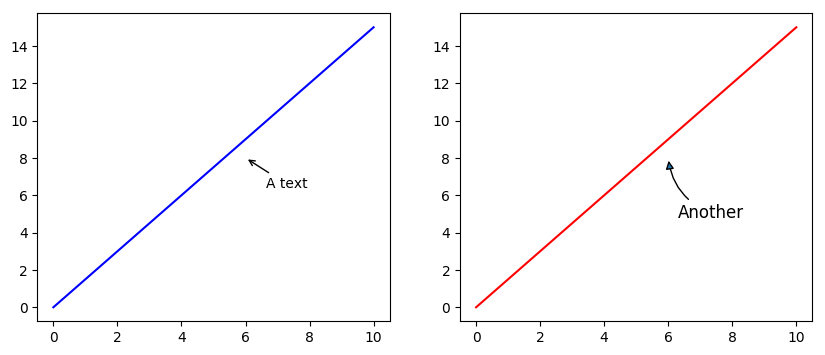

In [16]:
plt.close('all')
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.plot([0, 10], [0, 15], 'b')
ax1.annotate(r'A text', xy=(6,8), xytext=(20, -30), textcoords='offset pixels', arrowprops=dict(arrowstyle='->'))

ax2.plot([0, 10], [0, 15], 'r')
ax2.annotate(r'Another', xy=(6,8), xytext=(10, -60), textcoords='offset pixels', fontsize=12, 
             arrowprops=dict(arrowstyle='-|>', connectionstyle='arc3, rad=-0.3'))  # 指定圆弧半径，负值表示顺时针画弧

plt.show()

上例中，arrowprops 要传入一个字典。该字典的 arrowwstyle 键可选的值（大致都是象形的，不再注释中文含义）有：

| arrowstyle 参数 | 等效参数形式 | 
| --- | --- | 
| '-' | None |
| '->' | head_length=0.4,head_width=0.2 |
| '-[' | widthB=1.0,lengthB=0.2,angleB=None |
| '&#124;-&#124;' | widthA=1.0,widthB=1.0 |
| '-&#124;>' | head_length=0.4,head_width=0.2 |
| '<-' | head_length=0.4,head_width=0.2 |
| '<->' | head_length=0.4,head_width=0.2 |
| '<&#124;-' | head_length=0.4,head_width=0.2 |
| '<&#124;-&#124;>' | head_length=0.4,head_width=0.2 |

connectionstyle 键可选的值：

| connectionstyle 参数| 等效参数形式 |
| --- | --- |
| angle	| angleA=90,angleB=0,rad=0.0 |
| angle3 | angleA=90,angleB=0 | 
| arc | angleA=0,angleB=0,armA=None,armB=None,rad=0.0 |
| arc3 | rad=0.0 |
| bar | armA=0.0,armB=0.0,fraction=0.3,angle=None |

### 网格：Axes.grid

一个基础的例子：

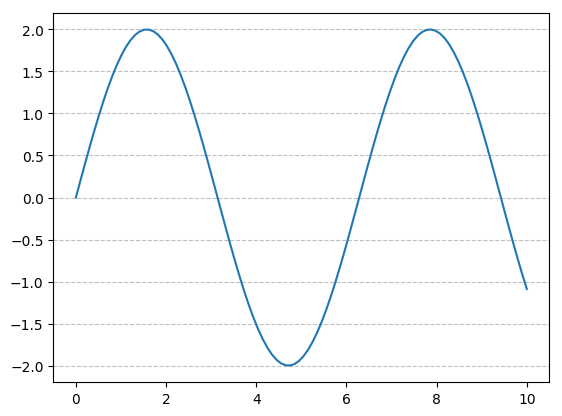

In [17]:
x = np. linspace (0, 10, 100)
y = 2 * np.sin(x)

plt.close("all")
plt.plot(x, y)

# 其实简单地使用 "plt.grid(True)"  就可以显示网格
plt.grid(axis='y', linestyle='--', color='0.75')  # 灰度适当很重要
plt.show()

下例给出了网格线的绘制步骤，以及主要、次要网格线分开设置的方法。

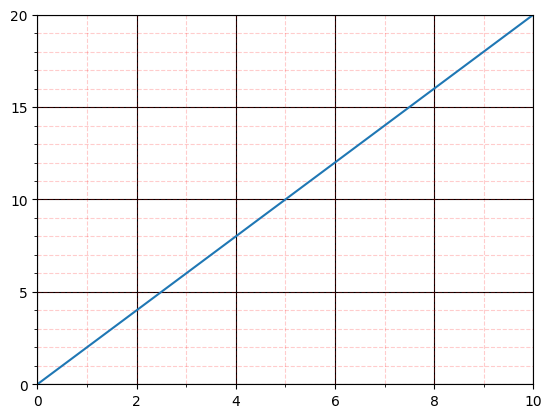

In [18]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

x = np. linspace (0, 10, 100)
y = 2*x
plt.close('all')

fig, ax = plt.subplots()
ax.plot(x, y)
ax.xaxis.set_major_locator(MultipleLocator(2))
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.grid(which='major', linestyle='-', color='k')
ax.grid(which='minor', linestyle='--', color='r', alpha=0.2)
ax.axis([0, 10, 0, 20])

plt.show()

## 图像绘制

下面介绍不同种类的图像的绘制，如条形图、散点图等等。

### 水平竖直线或区域：Axes.axhline / axhspan

参数：图像中坐标轴的百分比位置 xmin/xmax/ymin/ymax。

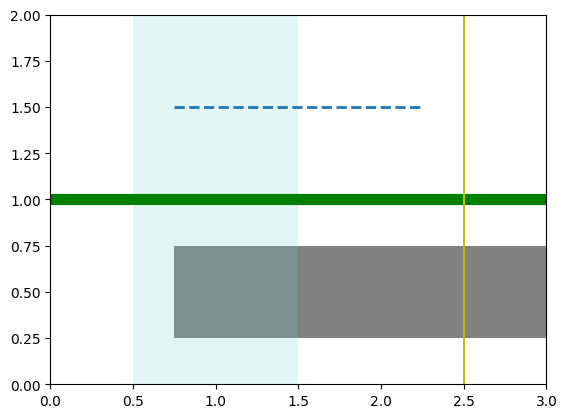

In [19]:
plt.close("all")
f, ax = plt.subplots()
ax.axis([0, 3, 0, 2])
ax.axhline(1, lw=8, color='g')
ax.axhline(y=1.5, ls="--", lw=2, xmin=0.25, xmax=0.75)
ax.axvline(2.5, color="y")
ax.axhspan(0.25, 0.75, xmin=0.25, facecolor='0.5')
ax.axvspan(0.5, 1.5, facecolor="#74D2D5", alpha=0.2)
plt.show()

### 散点图：Axes.scatter

参数：点大小向量s，点颜色向量c，透明度alpha。

此外，直接使用 `plot`命令可以绘制简单的点图。只要不指定线属性，绘图时就只绘制点而不绘制线。

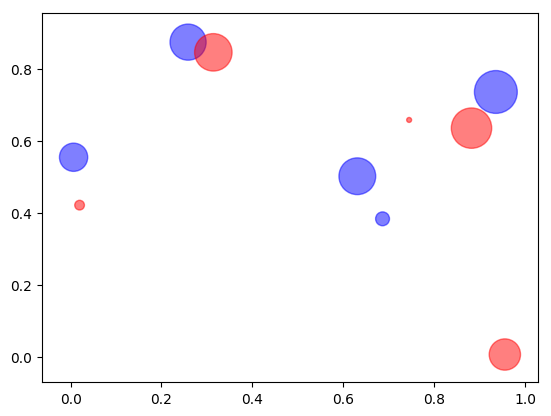

In [20]:
np.random.seed(230)
x, y = np.random.rand(2, 10)
np.random.seed(666)
point_size = 1000 * rand(10)

plt.close("all")
f, ax = plt.subplots()
ax.scatter(x, y, s=point_size, c=["b", "r"] * 5, alpha=0.5)
plt.show()

### 条形图：Axes.bar / barh

条形图命令 bar 用于绘制竖立的条形图，而 barh 用于绘制水平的。

在 `Axes.bar(left, height, width=0.8, bottom=None, **kwargs)` 命令中，条形的绘制区域是 `[left +/- width], [bottom, bottom + height]`。利用 yerr 与 error\_kw 参数，可以绘制 error 线在条形图中。 

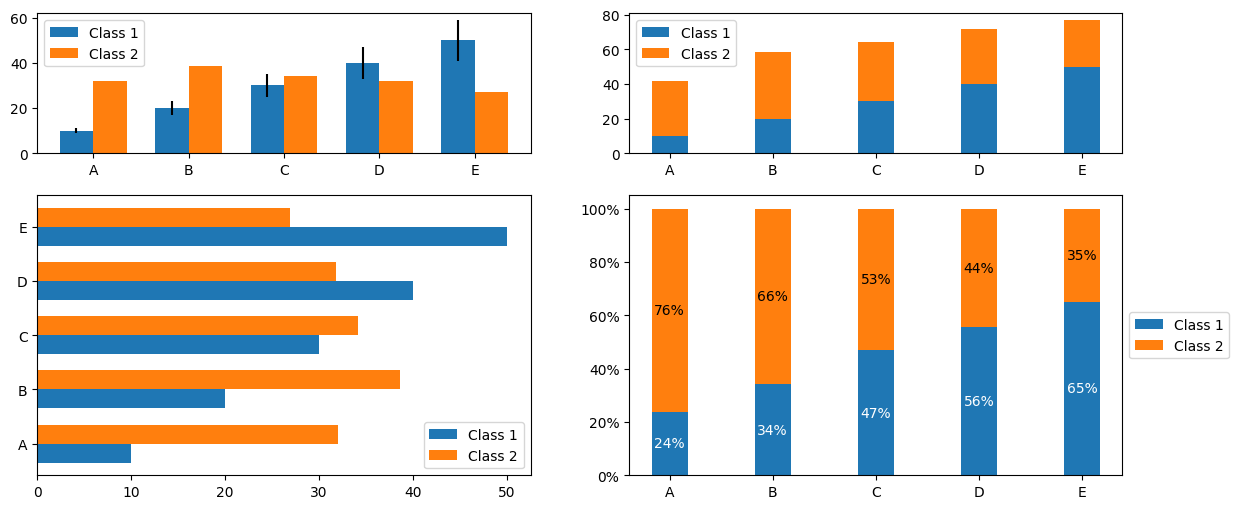

In [21]:
bar_width = 0.35
groups = np.arange(5)
y1 = np.linspace(10, 50, 5)
np.random.seed(0)
y2 = np.random.rand(5) * 40 + 10 

plt.close("all")
f, ax = plt.subplots(2, 2, figsize=(14, 6), gridspec_kw = {'height_ratios':[1, 2]})
# 并列竖立条形图
ax[0,0].bar(groups, y1, bar_width, label="Class 1",
          yerr=2 * groups + 1)
ax[0,0].bar(groups + bar_width, y2, bar_width, label="Class 2")
ax[0,0].set_xticks(groups + bar_width / 2)
ax[0,0].set_xticklabels(list("ABCDE"))
ax[0,0].legend(loc="upper left")

# 堆叠竖立条形图
ax[0,1].bar(groups, y1, bar_width, label="Class 1")
ax[0,1].bar(groups, y2, bar_width, bottom=y1, label="Class 2")
ax[0,1].set_xticks(groups)
ax[0,1].set_xticklabels(list("ABCDE"))
ax[0,1].legend(loc="upper left")

# 横置条形图
ax[1,0].barh(groups, y1, bar_width, label="Class 1")
ax[1,0].barh(groups + bar_width, y2, bar_width, label="Class 2")
ax[1,0].set_yticks(groups + bar_width / 2)
ax[1,0].set_yticklabels(list("ABCDE"))
ax[1,0].legend(loc="lower right")

# 堆叠竖立百分比条形图（附百分比数字）
y1_percent = y1 / (y1 + y2)
y2_percent = y2 / (y1 + y2)
ax[1,1].bar(groups, y1_percent, bar_width, label="Class 1")
ax[1,1].bar(groups, y2_percent, bar_width, bottom=y1_percent, label="Class 2")
## 加上百分比字串
for k in range(len(groups)):
    ax[1,1].text(groups[k], y1_percent[k]/2, r"{:.0%}".format(y1_percent[k]),
                 color="w", ha="center", va="center")
    ax[1,1].text(groups[k], y2_percent[k]/2 + y1_percent[k], 
                 r"{:.0%}".format(y2_percent[k]), color="k", ha="center", va="center")
ax[1,1].set_xticks(groups)
ax[1,1].set_xticklabels(list("ABCDE"))
ax[1,1].legend(loc="center left", bbox_to_anchor=(1.0, 0.5))
## 设置 y 轴刻度
ax[1,1].yaxis.set_major_formatter(mpl.ticker.FuncFormatter(
                                  lambda y, pos: r"{:.0f}%".format(100*y)))

plt.show()

### 直方图：Axes.hist

参数：`histtype` 可以指定为 "bar"（默认）或者 "barstacked", "step", "stepfilled" 四种类型，其中 "barstacked" 与 "bar" 参数外加 "stacked=True" 的效果是一样的。`rwidth` 可以指定每组的柱形宽度占组宽的多少。`normed` 参数用于控制标准化，使各条形面积总和为 1。`weights` 参数用于添加计数权重，尺寸与数据尺寸一致。最后，`color` 参数来传入一个控制颜色的元组。

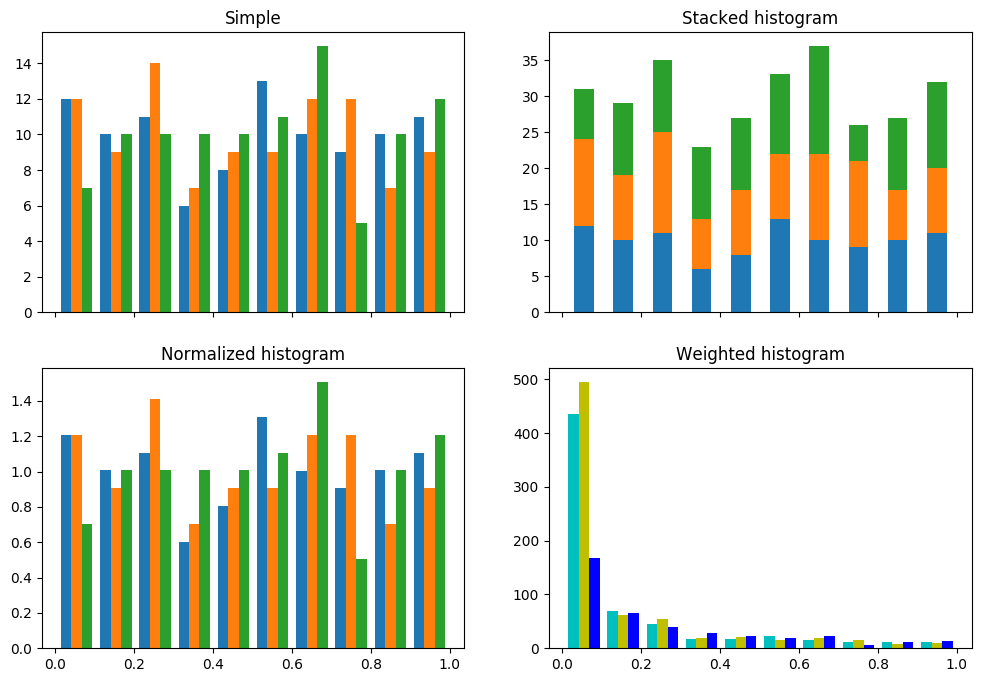

In [22]:
np.random.seed(0)
x = np.random.rand(100, 3)
bins_num = 10

plt.close("all")
f, ax = plt.subplots(2, 2, sharex=True, figsize=(12, 8))
ax[0,0].hist(x, bins_num)
ax[0,0].set_title("Simple")
ax[0,1].hist(x, bins_num, histtype="bar", stacked=True, rwidth=0.5)
ax[0,1].set_title("Stacked histogram")
ax[1,0].hist(x, bins_num, normed=True)
ax[1,0].set_title("Normalized histogram")
ax[1,1].hist(x, bins_num, color=("c", "y", "b"), weights=1/x)
ax[1,1].set_title("Weighted histogram")

plt.show()

### 箱形图：Axes.boxplot

箱形图的参数比较多：
- `labels`：字符串列表。作为分组标签。
- `width`：列表。指定各箱形图的宽度。
- `vert`：默认为 True。为 False 时，箱形图将横向绘制。
- `whis`：数字，列表，或者“range”，用于指定正常值范围。一般地，箱形图中会找到低、高两个四分位点 Q1 与 Q3，并在它们之间（IQR=Q3-Q1）绘制箱形图的主体。而箱形图中的高、低的两个 cap 所确定的正常值范围，则是由 `Q3 + whis * IQR` 与 `Q1 - whis * IQR` 决定的，其中 `whis` 的默认值是 1.5。除了给该参数传入数字，也可以传入：
    - 字符串“range”，表示将所有数据点纳入正常值范围。
    - 数字列表：以 `[a, b]` 的形式传入，表示正常值范围从 a 百分位到 b 百分位。
- 均值相关的参数：
    - `showmeans`：布尔型，默认 False。显示均值。以下参数在 showmean=True 时有效。
    - `meanline`：布尔型。在箱形图中绘制一条横线，表示均值的位置。
    - `meanprops`：字典。指定均值参数。可以是点属性，也可以是线属性，参考下例。
- 中位数相关的参数：
    - `medianprops` 用法类似均值参数。
    - `usermedians`传入一个 n 乘 2 数组，数组中**非None**的元素会取代对应位置的正常计算的中位数。
- 箱体相关的参数：`showbox`，`boxprops`。
- 异常值（flier）、须（whisker）与区间壁（cap）相关的参数：`showcaps`，`showfliers`，`flierprops`，`capprops`， `whiskerprops`。
- 置信区间参数：
    - `notch`：布尔型。绘制 V 型（中值处内缩的）箱形图。
    - `conf_intervals `：置信区间，n 乘 2 数组（n为单组数据点个数，下例为1000）。
    - `bootstrap`：整数。用自助抽样法抽取指定个数的样本，并标注 95% 置信区间。
- 美化参数：`patch_artist` 默认 False。如果为 True，会填充箱形区域，并支持更改颜色。比如 `facecolor` 参数，它在 `patch_artist=False` 时是无法传入给 boxprops 字典的，因为两种模式下 `boxplot` 返回的类型是不同的。 

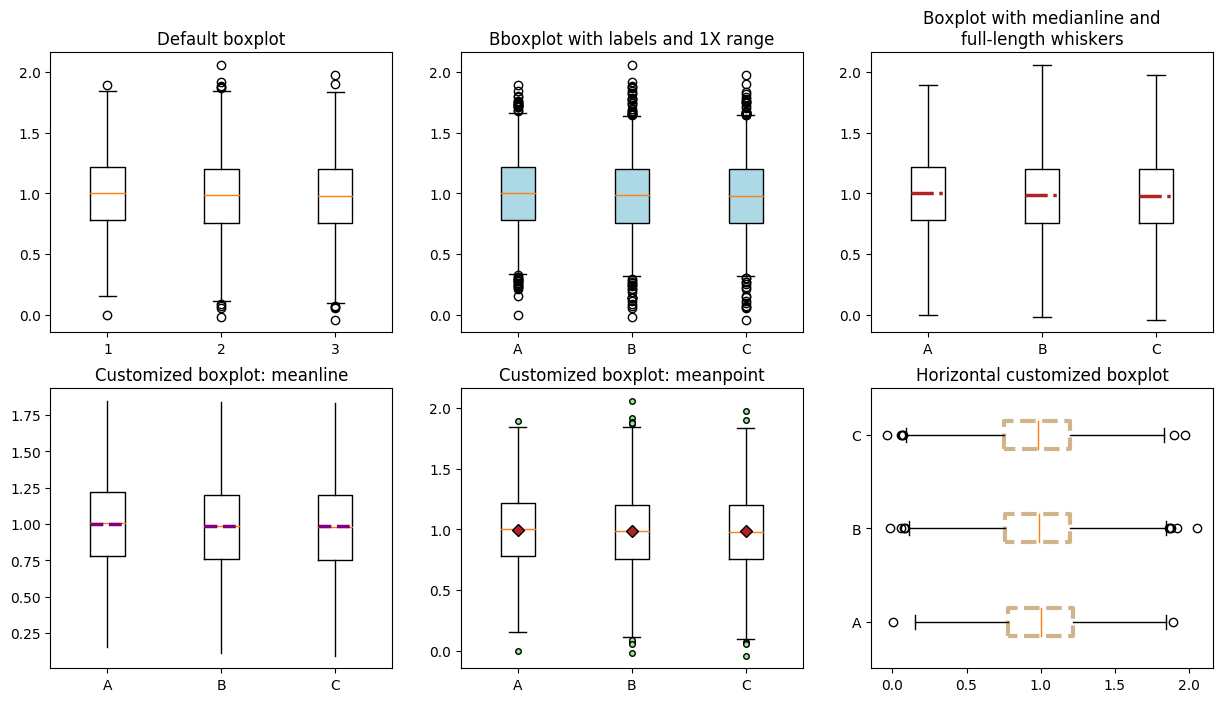

In [23]:
# 本例源自：http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.boxplot.html
mu, sigma = 1, 1/3
np.random.seed(0)
x = np.random.normal(mu, sigma, size=(1000, 3))

# Properties 
boxprops = dict(linestyle='--', linewidth=3, color='tan')
flierprops = dict(marker='o', markerfacecolor='lightgreen', markersize=4,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick', markersize=6)
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

# Plot
plt.close("all")
f, ax = plt.subplots(2, 3, figsize=(15, 8))
ax[0,0].boxplot(x)
ax[0,0].set_title("Default boxplot")
ax[0,1].boxplot(x, whis=1, labels=list("ABC"),
                patch_artist=True, boxprops = dict(facecolor=("lightblue")))
ax[0,1].set_title("Bboxplot with labels and 1X range")
ax[0,2].boxplot(x, medianprops=medianprops, whis="range", labels=list("ABC"))
ax[0,2].set_title("Boxplot with medianline and\nfull-length whiskers")
ax[1,0].boxplot(x, showcaps=False, showfliers=False, labels=list("ABC"),
                showmeans=True, meanline=True, meanprops=meanlineprops,)
ax[1,0].set_title("Customized boxplot: meanline")
ax[1,1].boxplot(x, showmeans=True, flierprops=flierprops, 
                meanprops=meanpointprops, labels=list("ABC"))
ax[1,1].set_title("Customized boxplot: meanpoint")
ax[1,2].boxplot(x, vert=False, boxprops=boxprops, labels=list("ABC"))
ax[1,2].set_title("Horizontal customized boxplot")

plt.show()

### 等高线图：Axes.contour(f)

contour 有以下几种调用方法：
- contour(Z, ...)表示在网格上，绘制高度为 Z 的等高线图。
- contour(Z, N, ...)表示绘制高度为 Z 的等高线图，其等高线总数为 N 且自动选定。
- contour(Z, V, ...)表示绘制高度为 Z 的等高线图，其等高线满足列表 V 指定要绘制等高线的高度位置。
- 以上所有调用方法之前，均可以加上 X, Y 参数，表示在  X,Y 网格上绘制。

其他的一些常用参数（contour 还可以使用 linestyle 与 linewidth）：
- `colors`：单个字串或一个字串元组。设定等高线颜色。
- `levels`：即上述调用方法中的 V 参数。
- `orgin`：[当 X,Y 指定时无作用] 默认'None'，即 Z 的首元素是左下角点。可选'upper'/'lower'/'image'。如果设为'image'，rc值中的`image.origin`会被使用。
- `extent`：[当 X,Y 指定时无作用] 以四元元组 `(x0, x1, y0, y1)` 的方式传值。如果 `origin` 非 None，它给出图像的边界；如果 `origin` 是 None，则 (x0, y0) 表示 Z[0,0] 的位置，(x1, y1) 表示 Z[-1, -1] 的位置。

至于命令 `Axes.clabel(CS, ...)`，它设置了 CS 对象中存储的等高线的高度标记格式，具体参数有：

- `inline`：布尔型。是否移除高度标记位置下方的等高线，默认 True。
- `inline_spacing`：数字。高度标记两侧到等高线的空距，默认 5 像素。
- `fmt`：格式化字串。用于指定高度标记的格式，默认 '%1.3f'（小数点左一位右三位）。
- `colors`：单个字串或一个字串元组。设定高度标记颜色。

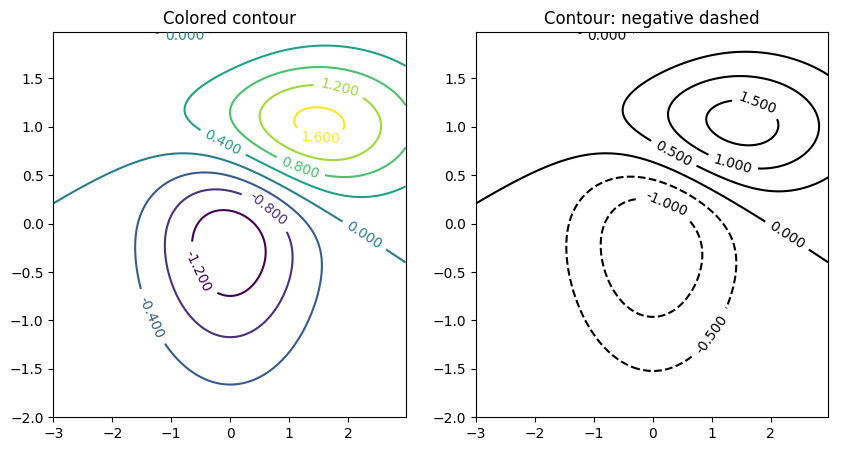

In [24]:
# 本例改编自：http://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.contour.html
import matplotlib.mlab as mlab

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)  # 生成网格
np.random.seed(0)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)  # 联合正态
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10.0 * (Z2 - Z1)

plt.close("all")
f, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].clabel(ax[0].contour(X, Y, Z, 8), inline=True) 
ax[0].set_title("Colored contour")

# 想要取消负高度虚线，使用：
# matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
ax[1].clabel(ax[1].contour(X, Y, Z, 6, colors="k"), inline=True)
ax[1].set_title("Contour: negative dashed")

plt.show()

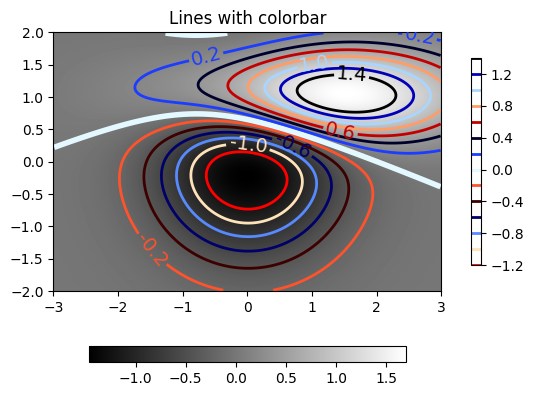

In [25]:
# 另一个例子，也改编自上例
import matplotlib.cm as cm

plt.close("all")
plt.figure()
# 显示一个图片到坐标轴上
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# 加粗高度为 0 的等高线
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

# 每隔一个 level, 标记一次高度
plt.clabel(CS, levels[1::2],
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# 添加一个颜色条
CB = plt.colorbar(CS, shrink=0.8, extend='both')
plt.title('Lines with colorbar')

# 交换以下两行的注释与否，可以得到不同的色图
#plt.hot()
plt.flag()

# 可以再加上另一个颜色条
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# 调整先前颜色条的位置
l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])

plt.show()

说完 `contour`，再看一个 `contourf` 的例子：

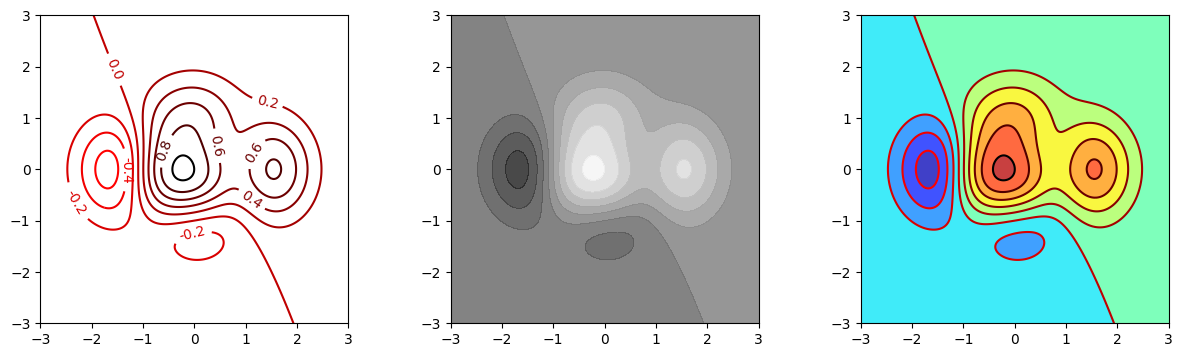

In [26]:
# 本例改编自：http://www.labri.fr/perso/nrougier/teaching/matplotlib/#contour-plots
# import matplotlib.cm as cm
plt.close('all')
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

def f(x,y): return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
X,Y = np.meshgrid(np.linspace(-3,3,n), np.linspace(-3,3,n))
Z = f(X, Y)

# 只画出边界：contour
C1 = ax1.contour(X, Y, Z, 8, linewidth=.5)
ax1.clabel(C1, inline=1, fontsize=10, fmt='%0.1f')  # 等高线标上数字
ax1.axis('scaled')

# 只填充颜色：contourf
ax2.contourf(X, Y, Z, 8, alpha=.75, cmap=cm.gray)
ax2.axis('scaled')

# 绘制边界并填充颜色
ax3.contour(X, Y, Z, 8, color='k', linewidth=.5)
ax3.contourf(X, Y, Z, 8, alpha=.75, cmap='jet')
ax3.axis('scaled')

plt.show()

其中，contourf 的 cmap 参数支持的字串有以下几种：

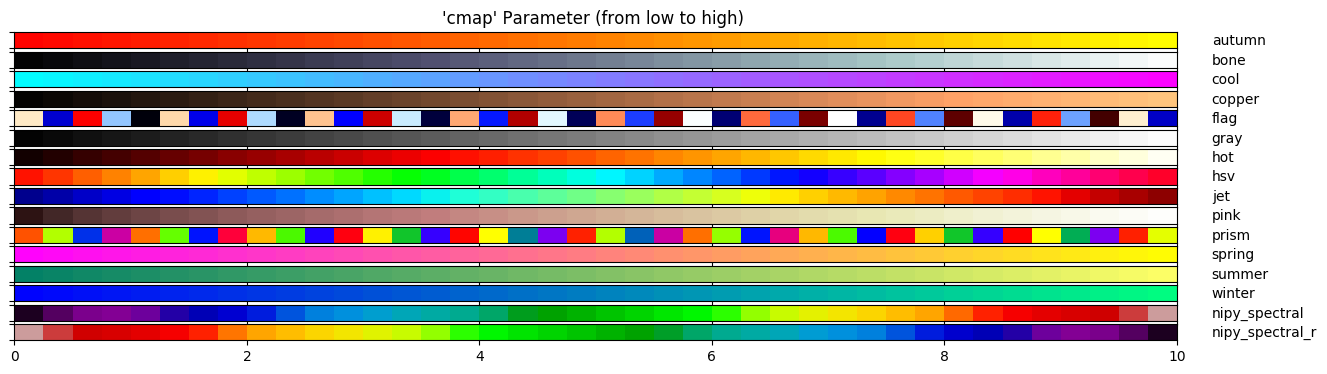

In [27]:
cmap_paras = ['autumn', 'bone', 'cool', 'copper', 'flag', 'gray', 'hot', 'hsv', 
              'jet', 'pink', 'prism', 'spring', 'summer', 'winter',
              'nipy_spectral', 'nipy_spectral_r']

plt.close('all')
fig, axarr = plt.subplots(len(cmap_paras), 1, sharex=True, figsize=(15, 4))

X, Y = np.meshgrid(np.linspace(0, 10, 1000), np.linspace(0, 1, 10))
Z = X 

axarr[0].set_title('\'cmap\' Parameter (from low to high) ')
for index, cmapstr in enumerate(cmap_paras):
    axarr[index].contourf(X, Y, Z, 40, cmap=cmapstr)  # 分为40级
    axarr[index].text(10.3, 0.2, cmapstr)
    axarr[index].set_yticklabels([])

plt.show()

## 其他命令

### 填充：Axes.fill_between / fill_betweenx

参数：填充指定区域where，使用插值的精确点而不是原有的数据点interpolate=True。

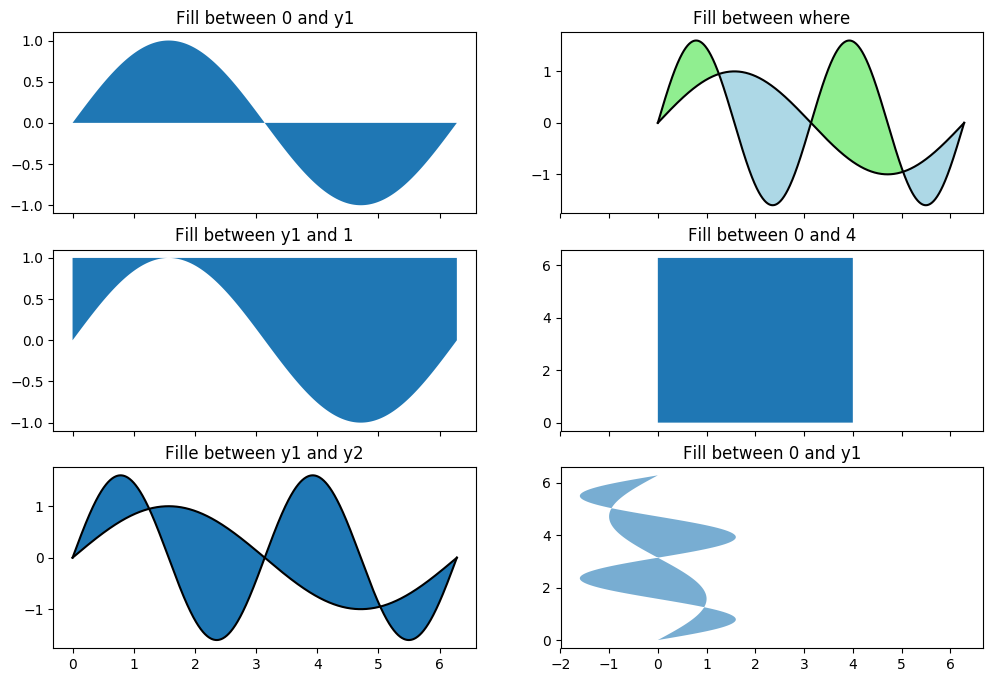

In [28]:
x = np.linspace(0, 2 * np.pi, 1000)

plt.close("all")
f, ax = plt.subplots(3, 2, sharex="col", figsize=(12, 8))
y1 = np.sin(x)
y2 = 1.6 * np.sin(2 * x)

ax[0,0].fill_between(x, 0, y1)
ax[0,0].set_title("Fill between 0 and y1")

ax[1,0].fill_between(x, y1, 1)
ax[1,0].set_title("Fill between y1 and 1")

ax[2,0].plot(x, y1, x, y2, color="k")
ax[2,0].fill_between(x, y1, y2)
ax[2,0].set_title("Fille between y1 and y2")

ax[0,1].plot(x, y1, x, y2, color="k")
ax[0,1].fill_between(x, y1, y2, where = y2>y1, facecolor="lightgreen")
ax[0,1].fill_between(x, y1, y2, where = y2<y1, facecolor="lightblue")
ax[0,1].set_title("Fill between where")

ax[1,1].fill_betweenx(x, 0, 4)
ax[1,1].set_title("Fill between 0 and 4")

ax[2,1].fill_betweenx(x, y1, y2, alpha=0.6)
ax[2,1].set_title("Fill between 0 and y1")

plt.show()

### 对数坐标轴：Axes.loglog / semilogx / semilogy

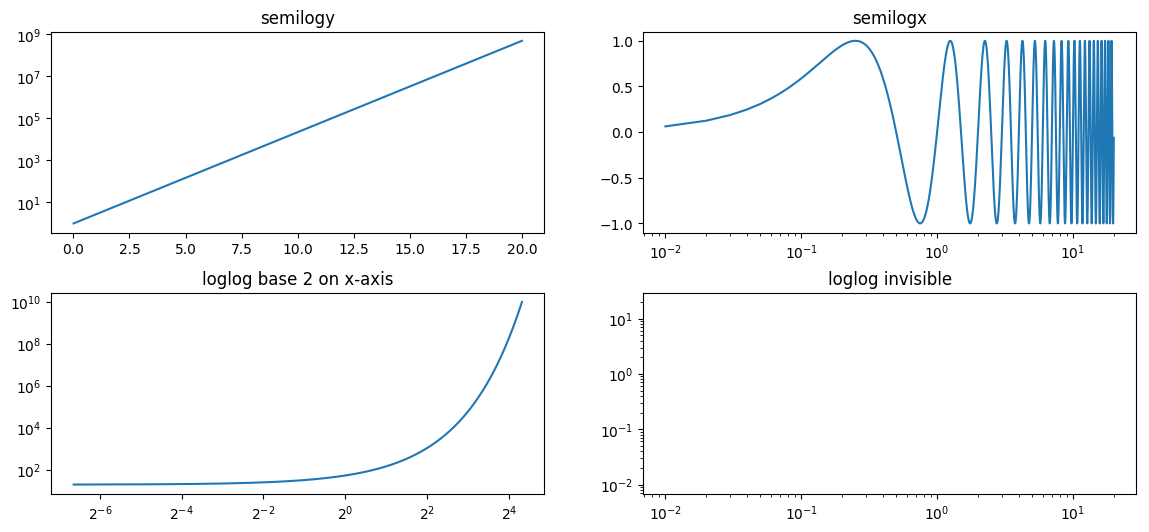

In [29]:
x = np.arange(0.01, 20, 0.01)

plt.close("all")
f, ax = plt.subplots(2, 2, figsize=(14, 6))
f.subplots_adjust(hspace=0.3)

ax[0,0].semilogy(x, np.exp(x))
ax[0,0].set_title("semilogy")

ax[0,1].semilogx(x, np.sin(2 * np.pi * x))
ax[0,1].set_title("semilogx")

ax[1,0].loglog(x, 20*np.exp(x), basex=2)
ax[1,0].set_title("loglog base 2 on x-axis")

ax[1,1].loglog(x, x, visible=False)
ax[1,1].set_title("loglog invisible")

plt.show()

### 极坐标

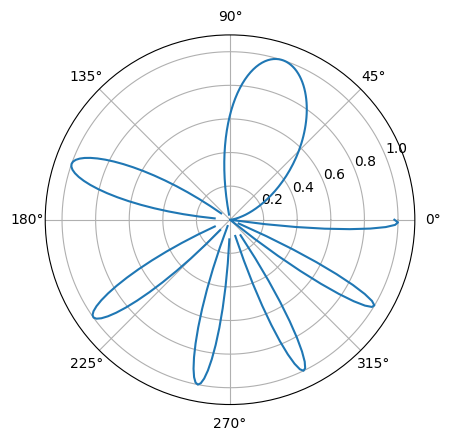

In [30]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)

plt.close('all')
fig, ax = plt.subplots(1, 1, subplot_kw=dict(projection='polar'))  # 或者 dict(polar=True)
ax.plot(x, y)

plt.show()

### 左手坐标系

实质是翻转了 X 坐标轴。类似地，Y 坐标轴也可以被翻转。

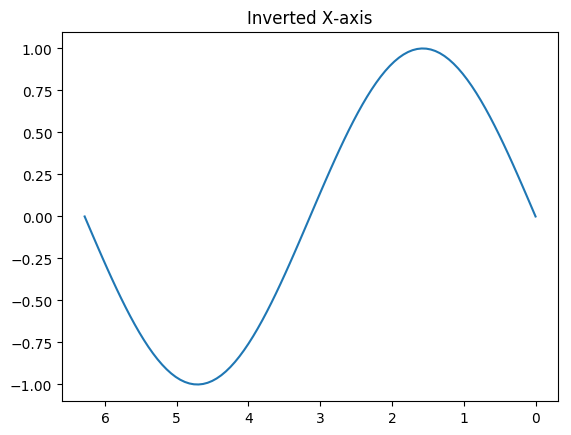

In [31]:
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x)

plt.close("all")
f, ax = plt.subplots()
ax.plot(x, y)
ax.invert_xaxis()
ax.set_title("Inverted X-axis")

plt.show()

可以用 `xaxis_inverted` 来检测坐标轴是否处于翻转状态：

In [32]:
ax.xaxis_inverted(), ax.yaxis_inverted()

(True, False)

## 附：GIF 动态图保存

这是一个非常有趣的功能。GIF 动态图的绘制与生成不同于静态图像。主要使用 matplotlib 中的 animation 模块。

### 前提工作

在开始绘制动态图之前，你可能需要一些工作来保证命令正常运行：

1. 下载并安装 [ImageMagick](https://www.imagemagick.org/script/download.php)，比如 Windows 用户选择“ImageMagick-x.x.x-0-Q16-x64-dll.exe”版本。其中 Q16 表示颜色的位深度，x.x.x是版本号。**请记录你将它安装到了何处。**安装成功后，在命令行下输入“convert”应当会正常调用ImageMagick。
2. 如果在安装后仍不能生成 GIF，那可能需要编辑你的 matplotlib 配置文件。你可以这样查找你的配置文件路径：

In [33]:
import matplotlib as mpl
mpl.matplotlib_fname()

'e:\\python\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

然后用文本编辑器打开 matplotlibrc，找到被“\#”注释的以下两行：

    #animation.ffmpeg_path: 'ffmpeg'
    #animation.convert_path: 'convert'

替换为（路径改成你的 ImageMagick 安装路径）：

    animation.ffmpeg_path: F:\ProgramFiles\ImageMagick-7.0.5-Q16\ffmpeg.exe
    animation.convert_path: F:\ProgramFiles\ImageMagick-7.0.5-Q16\convert.exe

### 例子

至于如何生成 GIF，例子如下。一些要点：

- 通常需要定义一个 update 函数。
- 通过 `FuncAnimation` 函数的 interval 参数，控制每帧停留的时间。
- 你可以使用 `set_data`（需要传入一个两行 n 列的 np.array 对象，或者两个类 List 对象） 代替 `set_ydata / set_xdata`。

In [34]:
from matplotlib.animation import FuncAnimation

x = np.linspace(0, 1, 100)
y = np.arange(0.05, 5, 0.05)

fig, ax = plt.subplots(figsize=(8,6))
# 注意这里把 plot 的结果保存到一个 Lines 对象
# 这个初始帧不会写入到 GIF
frames, = ax.plot(x, x)  

def update_gif(k, X=x):
    frames.set_ydata(np.power(X, k))
    ax.set_title("Curve of $y=x^k$ when k={:.2f}".format(k))
    ax.axis([0, 1, 0, 1])
    return frames, 

anim = FuncAnimation(fig, update_gif, y, interval=0.1*1000)  # 依次传入y并更新帧

# 以下是保存为 gif

# gif_path = os.path.join(os.getcwd(), "{0}_files".format("Py3-matplotlib"))
# if not os.path.exists(gif_path):
#     os.makedirs(gif_path)                 
# anim.save(os.path.join(gif_path, "{0}_01.gif".format("Py3-matplotlib")), dpi=100, writer='imagemagick')

由于不能直接 plt.show（否则会把每一帧输出为单独的图片），这里我用 Markdown 的语法来嵌入这个 GIF:

![png](https://wklchris.github.io/assets/ipynb-images/Py3-matplotlib_01.gif)

如果你觉得 matplotlib + ImageMagick 的操作仍不能满足一些复杂的 GIF 要求，我推荐使用第三方的、带有图形界面的 GIF 制作软件，例如 Ulead Gif Animator. 